In [165]:
## import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [166]:
def read_data(ticker):
    df = pd.read_csv(ticker)
    df.columns = ['Date', 'Price', 'Close', 'High', 'Low', 'Volume', 'Change %']
    df['Close'] = df['Close'].str.replace(',','')
    df['Close'] = pd.to_numeric(df['Close'], downcast='float')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values("Date", ascending= True)
    df = df.set_index("Date")
    return df

In [167]:
vcb = 'VCB Historical Data.csv'
fpt = 'FPT Historical Data.csv'
pnj = 'PNJ Historical Data.csv'

In [168]:
df_vcb = read_data(vcb)
df_fpt = read_data(fpt)
df_pnj = read_data(pnj)

In [169]:
def change_type_volume(series):
    volume = []
    for number in  series:
        if "M" in number:
            number = number[:-1]
            number = float(number)*pow(10,6)
            volume.append(number) 
        elif "K" in number:
            number = number[:-1] 
            number = float(number)*pow(10,3)    
            volume.append(number)        
    return volume
                       

In [170]:

df_vcb['Volume'] = change_type_volume(df_vcb['Volume'])
df_pnj['Volume'] = change_type_volume(df_pnj['Volume'])
df_fpt['Volume'] = change_type_volume(df_fpt['Volume'])


In [171]:
df_vcb

,Price,Close,High,Low,Volume,Change %
Date,,,,,,
2019-01-02,"41,161",41391.0,"41,698","41,084",1380000.0,0.19%
2019-01-03,"41,161",41468.0,"41,545","40,470",1370000.0,0.00%
2019-01-04,"41,775",40931.0,"41,775","40,393",1670000.0,1.49%
2019-01-07,"41,929",42466.0,"42,620","41,852",1500000.0,0.37%
2019-01-08,"42,236",42236.0,"42,390","41,852",1680000.0,0.73%
...,...,...,...,...,...,...
2023-05-05,"89,800",88500.0,"89,900","88,200",225700.0,1.47%
2023-05-08,"93,000",90000.0,"93,200","89,800",1500000.0,3.56%
2023-05-09,"92,300",93000.0,"93,900","92,300",563400.0,-0.75%


### Data Visualization

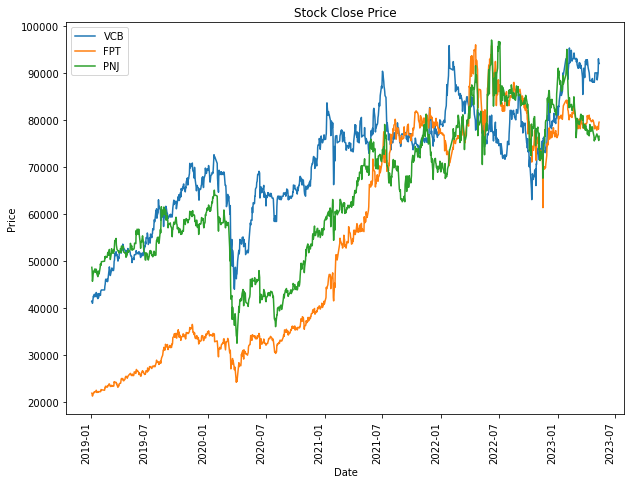

In [172]:
## Plot Stock open price
df_vcb['Close'].plot(figsize=(10,8) , title="Stock Close Price", label = "VCB", xlabel='Datetime', ylabel='Price') 
df_fpt['Close'].plot(label = "FPT")
df_pnj['Close'].plot(label = "PNJ")
plt.xticks(rotation ='vertical')
plt.legend()

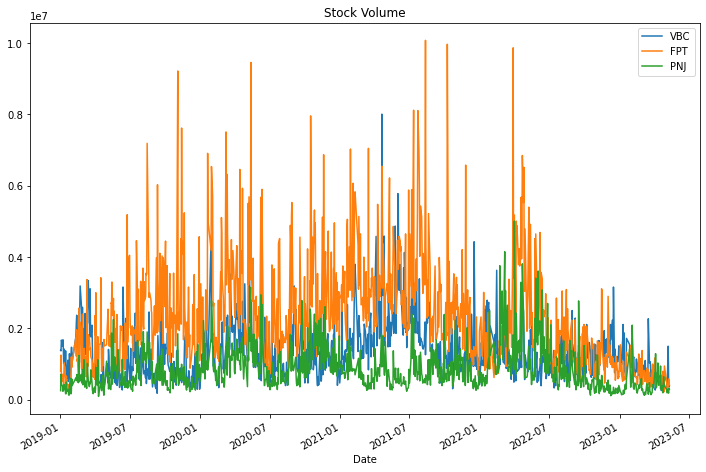

In [110]:
## Plot Volume
df_vcb['Volume'].plot(figsize = (12,8), title ="Stock Volume", label = "VBC")
df_fpt['Volume'].plot(label = "FPT")
df_pnj['Volume'].plot(label = 'PNJ')
plt.legend()

In [181]:
## giá đóng cửa thấp/cao nhất của từng cổ phiếu
max_vcb = df_vcb['Close'].max()
max_fpt = df_fpt['Close'].max()
max_pnj = df_pnj['Close'].max()

min_vcb = df_vcb['Close'].min()
min_fpt = df_fpt['Close'].min()
min_pnj = df_pnj['Close'].min()

data = [['VCB', max_vcb, min_vcb], ['FPT', max_fpt, min_fpt], ['PNJ', max_pnj, min_pnj]]
df = pd.DataFrame(data, columns=['Name', 'Max_Close', 'Min_Close'])
df


,Name,Max_Close,Min_Close
0,VCB,95800.000000,40931.000000
1,FPT,95967.398438,21166.000000
2,PNJ,96987.000000,32429.800781


In [182]:
## Tỷ suất sinh lời cho từng cổ phiếu từ ( 2019 - now)
ret_fpt = max_fpt/min_fpt - 1
ret_vcb = max_vcb/min_vcb - 1
ret_pnj = max_pnj/min_pnj - 1
df['Ret'] = [ret_vcb, ret_fpt, ret_pnj]
df

,Name,Max_Close,Min_Close,Ret
0,VCB,95800.000000,40931.000000,1.340524
1,FPT,95967.398438,21166.000000,3.534036
2,PNJ,96987.000000,32429.800781,1.990675


In [183]:
### check ngày có giá mở cửa cao nhất
df['Datime_Max_Price'] = [df_vcb['Close'].idxmax(),df_fpt['Close'].idxmax(),df_pnj['Close'].idxmax()]
df['Datime_Min_Price'] = [df_vcb['Close'].idxmin(),df_fpt['Close'].idxmin(),df_pnj['Close'].idxmin()]
df

,Name,Max_Close,Min_Close,Ret,Datime_Max_Price,Datime_Min_Price
0,VCB,95800.000000,40931.000000,1.340524,2022-01-26,2019-01-04
1,FPT,95967.398438,21166.000000,3.534036,2022-04-19,2019-01-04
2,PNJ,96987.000000,32429.800781,1.990675,2022-06-08,2020-04-01


In [185]:
### Check khối lượng giao dịch lớn nhất cho từng cổ phiếu
df['volume_Max'] = [df_vcb['Volume'].max(), df_fpt['Volume'].max(), df_pnj['Volume'].max()]
df

,Name,Max_Close,Min_Close,Ret,Datime_Max_Price,Datime_Min_Price,volume_Max
0,VCB,95800.000000,40931.000000,1.340524,2022-01-26,2019-01-04,8010000.0
1,FPT,95967.398438,21166.000000,3.534036,2022-04-19,2019-01-04,10080000.0
2,PNJ,96987.000000,32429.800781,1.990675,2022-06-08,2020-04-01,5010000.0
